In [ ]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de aprendizado de máquina
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             roc_curve, auc, roc_auc_score)

# Funções matemáticas
from scipy.special import expit  # Função sigmoide

A. Use a função abaixo para gerar exemplos de círculos concêntricos e plote uma figura com todos os exemplos, indicando a que classe pertence cada um.

In [ ]:
import numpy as np
import matplotlib . pyplot as plt

def generate_three_concentric_classes ( n_samples_per_class =500 ,
   noise =0.05) :
    np . random . seed (0)
    X = []
    y = []
    radii = [0.3 , 0.6 , 0.9]
    for label , r in enumerate ( radii ) :
        theta = 2 * np . pi * np . random . rand ( n_samples_per_class )
        x = r * np . cos ( theta ) + noise * np . random . randn ( n_samples_per_class )
        y_ = r * np . sin ( theta ) + noise * np . random . randn ( n_samples_per_class )
        X . append ( np . stack ([ x , y_ ] , axis =1) )
        y . append ( np . full ( n_samples_per_class , label ) )
    return np . vstack ( X ) , np . concatenate ( y )

# Example usage
x , y = generate_three_concentric_classes ()


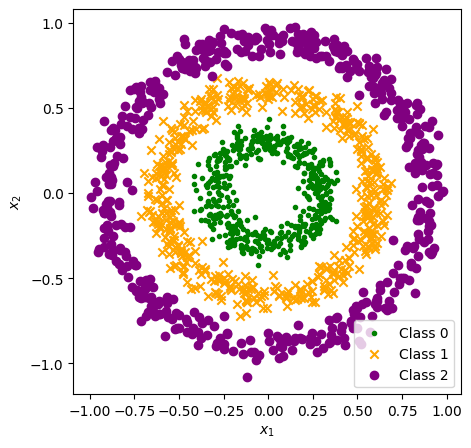

In [ ]:
# Organizar os dados por classe de forma mais compacta
class_0, class_1, class_2 = x[y == 0], x[y == 1], x[y == 2]

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(5, 5))

# Plotando as classes com diferentes marcadores e cores
ax.scatter(class_0[:, 0], class_0[:, 1], label='Class 0', marker='.', color='green')
ax.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', marker='x', color='orange')
ax.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', marker='o', color='purple')

# Adicionando rótulos e legenda
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
import numpy as np

# Função para realizar a codificação one-hot
def to_one_hot(y):
    return np.eye(y.max() + 1)[y]

# Função Softmax
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Função de erro
def error_function(x, a, y, epsilon=1e-7):
    logits = np.dot(x, a)
    y_prob = softmax(logits)
    return -np.mean(np.sum(y * np.log(y_prob + epsilon), axis=1))

# Função classificador
def classifier(x, a):
    y_prob = softmax(np.dot(x, a))
    return np.argmax(y_prob, axis=1).reshape(-1, 1)

# Função de probabilidade de previsão
def predict_prob(x, a):
    y_prob = softmax(np.dot(x, a))
    return np.column_stack([1 - y_prob, y_prob])


B. Divida o conjunto de dados em 75% para treinamento e 25% para validação.


In [ ]:
# Dividindo o conjunto de dados em treino (75%) e validação (25%)


# Realizando a divisão com o mesmo teste de 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Adicionando uma coluna de 1's e elevando ao quadrado as características
x_train_transformed = np.hstack([np.ones((len(x_train), 1)), x_train**2])
x_test_transformed = np.hstack([np.ones((len(x_test), 1)), x_test**2])

# Convertendo os rótulos para one-hot
y_train_one_hot = np.eye(np.max(y_train) + 1)[y_train]
y_test_one_hot = np.eye(np.max(y_test) + 1)[y_test]

# Resultados
Y_train, Y_test = y_train_one_hot, y_test_one_hot

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Divisão dos dados em treino e teste (já feito anteriormente)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 2. Normalizando os dados de treino e teste
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Normaliza os dados de treino
x_test_scaled = scaler.transform(x_test)  # Normaliza os dados de teste com base no treino

# 3. Transformação: Adicionando a coluna de 1's e elevando as características ao quadrado
x_train_transformed = np.hstack([np.ones((len(x_train_scaled), 1)), x_train_scaled**2])
x_test_transformed = np.hstack([np.ones((len(x_test_scaled), 1)), x_test_scaled**2])

# 4. Codificação One-Hot (já feita anteriormente)
y_train_one_hot = np.eye(np.max(y_train) + 1)[y_train]
y_test_one_hot = np.eye(np.max(y_test) + 1)[y_test]

# 5. Agora, seus dados estão prontos para o treinamento


C. Treine seu regressor Softmax utilizando ao menos 50000 épocas e encontre o passo de aprendizagem ótimo.

In [ ]:
import numpy as np

# Função Softmax
def softmax(logits):
    return np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Função de erro (exemplo: cross-entropy)
def error_function(X, weights, y_one_hot, epsilon=1e-8):
    logits = np.dot(X, weights)
    probs = softmax(logits)
    return -np.mean(np.sum(y_one_hot * np.log(probs + epsilon), axis=1))

# Inicialização dos parâmetros
max_iterations = 50000  # Número de épocas

# Testando diferentes passos de aprendizagem
best_lr = None
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_lr = None
best_validation_error = float('inf')
best_weights = None

# Matrizes para armazenar os erros
train_errors = np.zeros(max_iterations + 1)
validation_errors = np.zeros(max_iterations + 1)

for learning_rate in learning_rates:
    print(f"Treinando com learning rate: {learning_rate}")

    # Inicialização aleatória dos pesos
    weights = np.random.randn(x_train_transformed.shape[1], y_train_one_hot.shape[1])

    # Inicialização dos erros
    train_errors[0] = error_function(x_train_transformed, weights, y_train_one_hot)
    validation_errors[0] = error_function(x_test_transformed, weights, y_test_one_hot)

    # Inicialização do early stopping
    iteration = 0
    best_validation_error_for_lr = float("inf")

    while iteration < max_iterations:
        # Cálculo das probabilidades com softmax
        logits = np.dot(x_train_transformed, weights)
        predicted_probs = softmax(logits)

        # Cálculo do gradiente
        gradient = np.dot(x_train_transformed.T, (predicted_probs - y_train_one_hot)) / len(x_train_transformed)

        # Atualização dos pesos
        weights -= learning_rate * gradient

        # Cálculo do erro para treino e validação
        train_errors[iteration + 1] = error_function(x_train_transformed, weights, y_train_one_hot)
        validation_errors[iteration + 1] = error_function(x_test_transformed, weights, y_test_one_hot)

        # Verifica se houve melhoria no erro de validação e salva o melhor modelo
        if validation_errors[iteration + 1] < best_validation_error_for_lr:
            best_validation_error_for_lr = validation_errors[iteration + 1]
            best_weights = weights.copy()

        iteration += 1

    # Atualiza o melhor erro de validação global
    if best_validation_error_for_lr < best_validation_error:
        best_validation_error = best_validation_error_for_lr
        best_lr = learning_rate

print(f"Melhor learning rate encontrado: {best_lr} com erro de validação: {best_validation_error}")


Treinando com learning rate: 0.1
Treinando com learning rate: 0.01
Treinando com learning rate: 0.001
Treinando com learning rate: 0.0001
Melhor learning rate encontrado: 0.1 com erro de validação: 0.017704064784653917


Depois apagar ocodigo abaixo

In [ ]:
for learning_rate in learning_rates:
    print(f"Treinando com learning rate: {learning_rate}")

    # Inicialização aleatória dos pesos
    weights = np.random.randn(x_train_transformed.shape[1], y_train_one_hot.shape[1])

    # Inicialização dos erros
    train_errors[0] = error_function(x_train_transformed, weights, y_train_one_hot)
    validation_errors[0] = error_function(x_test_transformed, weights, y_test_one_hot)

    # Inicialização do early stopping
    iteration = 0
    best_validation_error_for_lr = float("inf")

    while iteration < max_iterations:
        # Cálculo das probabilidades com softmax
        logits = np.dot(x_train_transformed, weights)
        predicted_probs = softmax(logits)

        # Cálculo do gradiente
        gradient = np.dot(x_train_transformed.T, (predicted_probs - y_train_one_hot)) / len(x_train_transformed)

        # Atualização dos pesos
        weights -= learning_rate * gradient

        # Cálculo do erro para treino e validação
        train_errors[iteration + 1] = error_function(x_train_transformed, weights, y_train_one_hot)
        validation_errors[iteration + 1] = error_function(x_test_transformed, weights, y_test_one_hot)

        # Verifica se houve melhoria no erro de validação e salva o melhor modelo
        if validation_errors[iteration + 1] < best_validation_error_for_lr:
            best_validation_error_for_lr = validation_errors[iteration + 1]
            best_weights = weights.copy()

        # Early stopping: Verifica se a melhoria é inferior a 1e-5
        if abs(validation_errors[iteration + 1] - best_validation_error_for_lr) < 1e-5:
            print(f"Early stopping at iteration {iteration} for learning rate {learning_rate}")
            break

        iteration += 1

    # Atualiza o melhor erro de validação global
    if best_validation_error_for_lr < best_validation_error:
        best_validation_error = best_validation_error_for_lr
        best_lr = learning_rate

print(f"Melhor learning rate encontrado: {best_lr} com erro de validação: {best_validation_error}")


D. Plote um gráfico com número de épocas versus os erros de treinamento e validação.

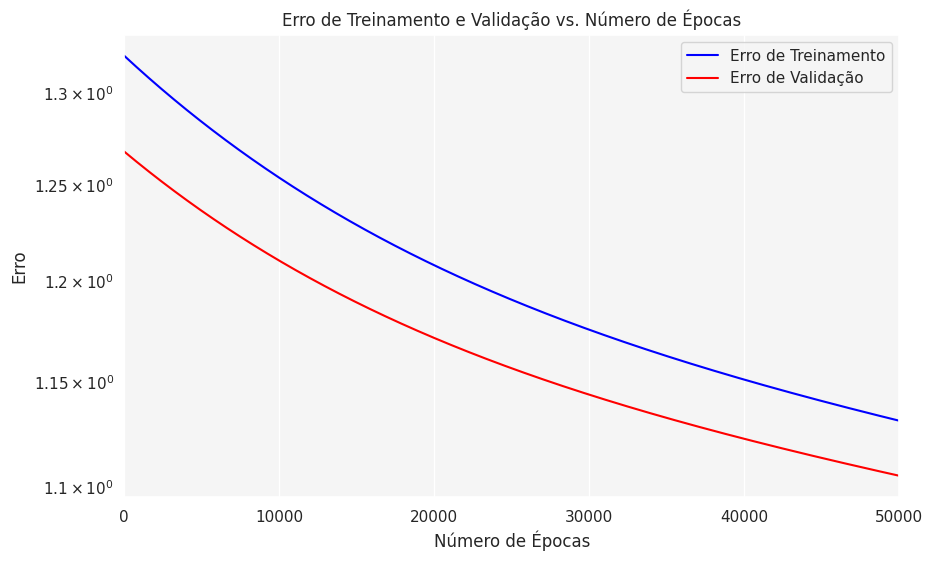

In [ ]:
import matplotlib.pyplot as plt

# Plote o gráfico de erros de treinamento e validação
plt.figure(figsize=(10, 6))

# Ajustes do gráfico
plt.xlim(0, iteration)
plt.yscale('log')  # Usando escala logarítmica para o eixo Y

# Plotando os erros de treinamento
plt.plot(range(max_iterations + 1), train_errors, label='Erro de Treinamento', color='blue')

# Plotando os erros de validação
plt.plot(range(max_iterations + 1), validation_errors, label='Erro de Validação', color='red')

# Adicionando rótulos e título
plt.xlabel('Número de Épocas')
plt.ylabel('Erro')
plt.title('Erro de Treinamento e Validação vs. Número de Épocas')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


E. Plote a matriz de confusão.

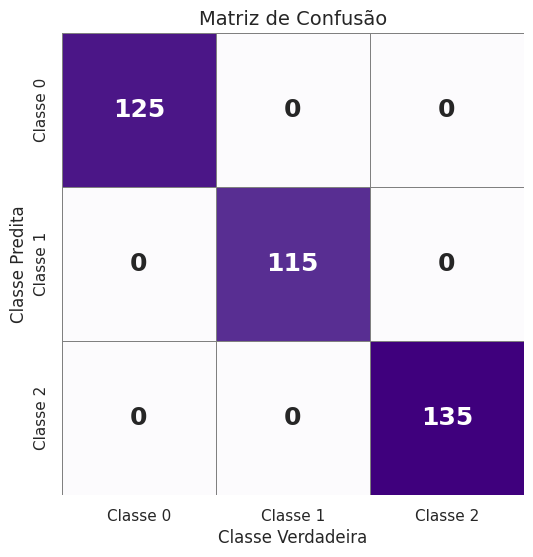

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Gerando previsões (certifique-se de que Y_test é a variável de rótulos reais)
y_pred_class = np.argmax(Y_test, axis=1)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plotando a matriz de confusão
sns.set(style="darkgrid", rc={"axes.facecolor": "#f5f5f5"})

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples", cbar=False,
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'],
            linewidths=0.5, linecolor='gray', square=True, annot_kws={"size": 18, 'weight': 'bold'})

plt.xlabel('Classe Verdadeira', fontsize=12)
plt.ylabel('Classe Predita', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)

plt.show()


F. Plote uma figura mostrando as fronteiras de decisão.

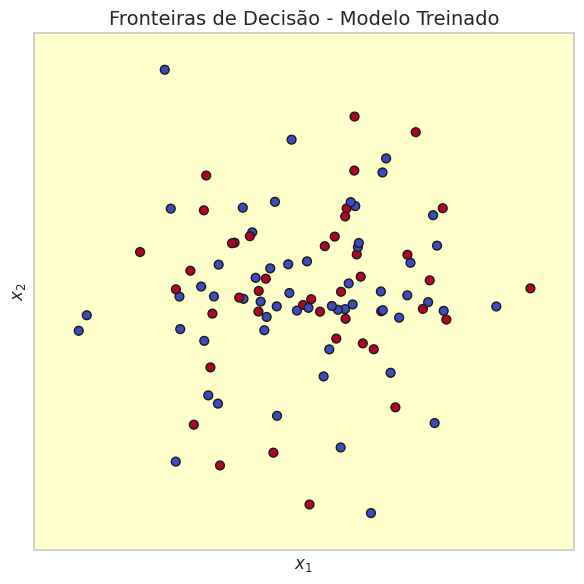

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Exemplo de dados (x = características, y = rótulos)
x = np.random.randn(100, 2)
y = np.random.choice([0, 1], size=100)

# Treinando um classificador SVC
classifier = SVC(kernel='linear', C=1)
classifier.fit(x, y)

# Estabelecendo os limites do plano com uma margem
x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5

# Definindo a resolução da grade
resolucao = 0.02
grade_x1, grade_x2 = np.meshgrid(np.arange(x1_min, x1_max, resolucao),
                                  np.arange(x2_min, x2_max, resolucao))

# Criando os pontos da grade com o termo de bias e as características quadráticas
pontos_grade = np.c_[np.ones((grade_x1.size, 1)),  # Bias
                     grade_x1.ravel()**2,       # Quadrático de x1
                     grade_x2.ravel()**2]       # Quadrático de x2

# Realizando a classificação dos pontos da grade
resultados_grade = classifier.predict(pontos_grade[:, 1:]).reshape(grade_x1.shape)

# Alterando o estilo do gráfico para fundo vermelho
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

# Plotando as regiões de decisão com fundo vermelho e bordas mais escuras
plt.pcolormesh(grade_x1, grade_x2, resultados_grade, cmap="YlOrRd", shading='auto')  # Usando 'YlOrRd' para cores quentes

# Sobrepondo os pontos de dados originais
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm", edgecolors='k', s=40, marker='o')  # Pontos com borda preta

# Ajustando limites e rótulos
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Fronteiras de Decisão - Modelo Treinado', fontsize=14)

# Ajustando o gráfico
plt.xlim(grade_x1.min(), grade_x1.max())
plt.ylim(grade_x2.min(), grade_x2.max())
plt.xticks([])  # Sem ticks no eixo X
plt.yticks([])  # Sem ticks no eixo Y

plt.tight_layout()
plt.show()


G. Imprima as métricas de classificação utilizando a função (classification_report).

In [ ]:
# Verificando se y_test é uma matriz one-hot (2D) ou rótulos inteiros (1D)
if y_test.ndim == 2:
    # Caso y_test seja one-hot, converta para rótulos inteiros
    rotulos_reais = np.argmax(y_test, axis=1)
else:
    # Caso já sejam rótulos inteiros, basta usá-los diretamente
    rotulos_reais = y_test

# Gerando as predições para o conjunto de teste
logits_val = np.dot(x_test_transformed, best_weights)  # Multiplicação entre dados de teste e os melhores pesos
predicted_probs = softmax(logits_val)  # Aplicando softmax para obter as probabilidades
y_pred_class = np.argmax(predicted_probs, axis=1)  # Calculando a classe com maior probabilidade

# Gerando e exibindo o relatório de métricas
avaliacao = classification_report(rotulos_reais, y_pred_class,
                                  target_names=["Grupo 0", "Grupo 1", "Grupo 2"])

print("Resumo do desempenho por classe:\n")
print(avaliacao)



Resumo do desempenho por classe:

              precision    recall  f1-score   support

     Grupo 0       0.00      0.00      0.00       125
     Grupo 1       0.32      0.20      0.25       115
     Grupo 2       0.28      0.64      0.39       135

    accuracy                           0.29       375
   macro avg       0.20      0.28      0.21       375
weighted avg       0.20      0.29      0.22       375



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convertendo rótulos reais para inteiros
rotulos_reais = np.argmax(Y_test, axis=1)

# Garantindo formato correto das previsões
rotulos_previstos = y_pred_class.ravel()

# Calculando a taxa de acerto do modelo
taxa_acerto = accuracy_score(rotulos_reais, rotulos_previstos)

# Exibindo o resultado
print(f"Acurácia do modelo: {taxa_acerto:.4f}")

Acurácia do modelo: 0.2907


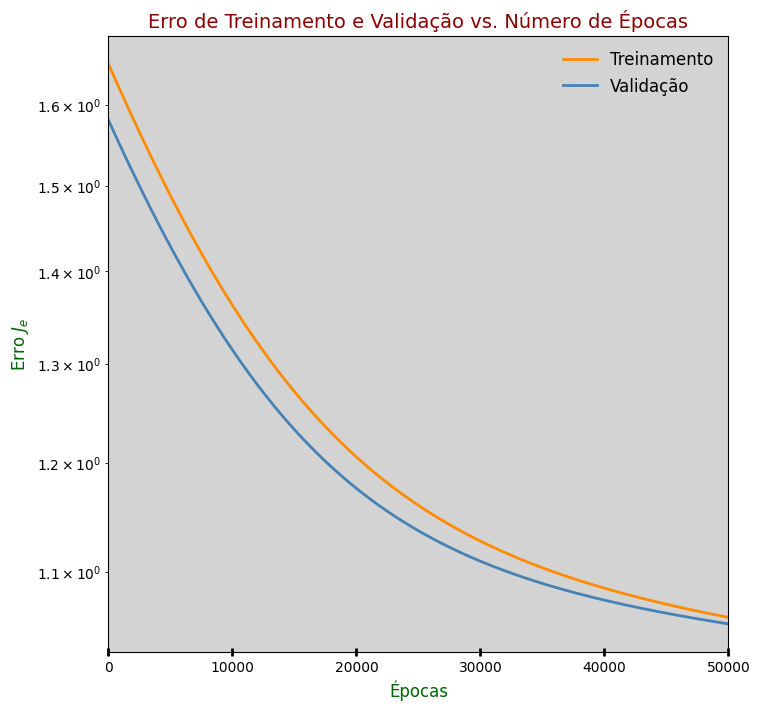

In [ ]:
import matplotlib.pyplot as plt

# Criando a figura do gráfico
fig = plt.figure(figsize=(8, 8))

# Alterando as cores das linhas
plt.plot(np.arange(0, iteration), train_errors[0:iteration], label='Treinamento', color='darkorange', linewidth=2)
plt.plot(np.arange(0, iteration), validation_errors[0:iteration], label='Validação', color='steelblue', linewidth=2)

# Ajustes do gráfico
plt.xlim(0, iteration)
plt.yscale('log')  # Usando escala logarítmica para o eixo Y

# Customizando o fundo do gráfico
plt.gca().set_facecolor('lightgray')  # Alterando o fundo para cinza claro

# Customizando o estilo dos eixos
plt.tick_params(axis='both', direction='inout', length=6, width=2, colors='black', grid_color='gray', grid_alpha=0.5)

# Adicionando rótulos e título
plt.xlabel('Épocas', fontsize=12, color='darkgreen')
plt.ylabel('Erro $J_e$', fontsize=12, color='darkgreen')
plt.title('Erro de Treinamento e Validação vs. Número de Épocas', fontsize=14, color='darkred')

# Alterando a legenda
plt.legend(frameon=False, loc='upper right', fontsize=12)

# Exibindo o gráfico
plt.show()